###  Install Prophet
Prophet is a time-series forecasting tool developed by Facebook. It’s ideal for handling seasonality, holidays, and irregular time series. This cell installs Prophet using pip.

In [13]:
!pip install prophet --quiet

###  Import Required Libraries
We import essential libraries: pandas for data handling, matplotlib for plotting, and Prophet for time-series forecasting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

###  Load the Dataset
Load the `train`, `features`, and `stores` CSV files into pandas DataFrames. These will be merged later for forecasting.


In [2]:
train = pd.read_csv('/content/train.csv')
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')

<ipython-input-2-597e12ebc940>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


###  Merge Datasets
We merge the datasets on appropriate keys: first `train` with `features` using `Store`, `Date`, and `IsHoliday`, then merge in `stores` by `Store`.


In [3]:
data = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = pd.merge(data, stores, on='Store', how='left')

###  Convert `Date` to datetime
Convert the `Date` column to Python's `datetime` format so that Prophet and pandas can work with it properly.


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

###  Filter Data for One Store and One Department
For simplicity, we forecast for a single Store–Department pair (Store 1, Dept 1). You can change these values as needed.


In [5]:
store_id = 1
dept_id = 1
subset = data[(data['Store'] == store_id) & (data['Dept'] == dept_id)]

###  Group Data by Date and Sum Weekly Sales
We group the filtered data by `Date` to get total weekly sales. This prepares the data in time-series format.


In [6]:
subset = subset.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()

###  Rename Columns for Prophet
Prophet requires columns named `ds` for date and `y` for the value to forecast. Rename accordingly.


In [7]:
subset = subset.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

###  Plot Historical Weekly Sales
Plot the sales data over time to observe trends, patterns, or seasonality in the historical data.


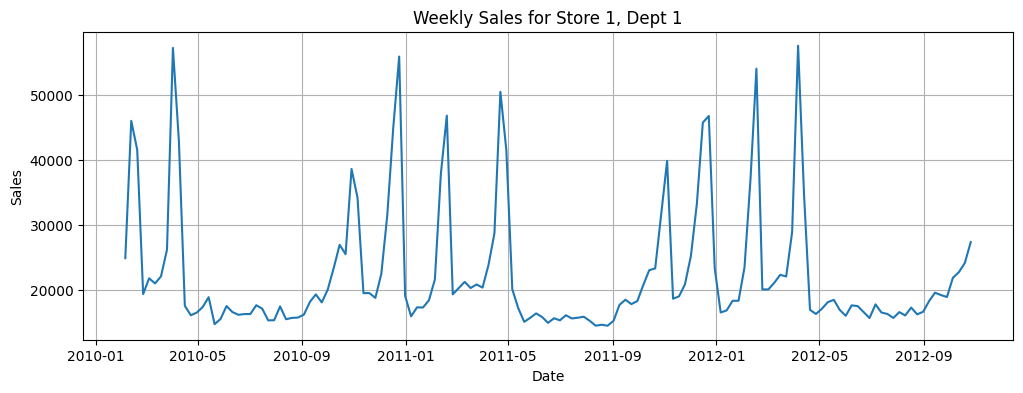

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(subset['ds'], subset['y'])
plt.title(f'Weekly Sales for Store {store_id}, Dept {dept_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

###  Train Prophet Model
Initialize and fit a Prophet model using the sales data. The model will learn trends and seasonality from past data.


In [9]:
model = Prophet()
model.fit(subset)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpypqc08ci/vdjp6riu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpypqc08ci/qsf3qo4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78972', 'data', 'file=/tmp/tmpypqc08ci/vdjp6riu.json', 'init=/tmp/tmpypqc08ci/qsf3qo4u.json', 'output', 'file=/tmp/tmpypqc08ci/prophet_modeljjap5wp3/prophet_model-20250512205116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###  Make Future Forecasts
Generate a DataFrame for future dates (12 weeks ahead) and use the model to predict future sales.


In [10]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

###  Plot Forecasted Sales
Visualize the sales forecast with confidence intervals. Prophet automatically plots historical and future values.


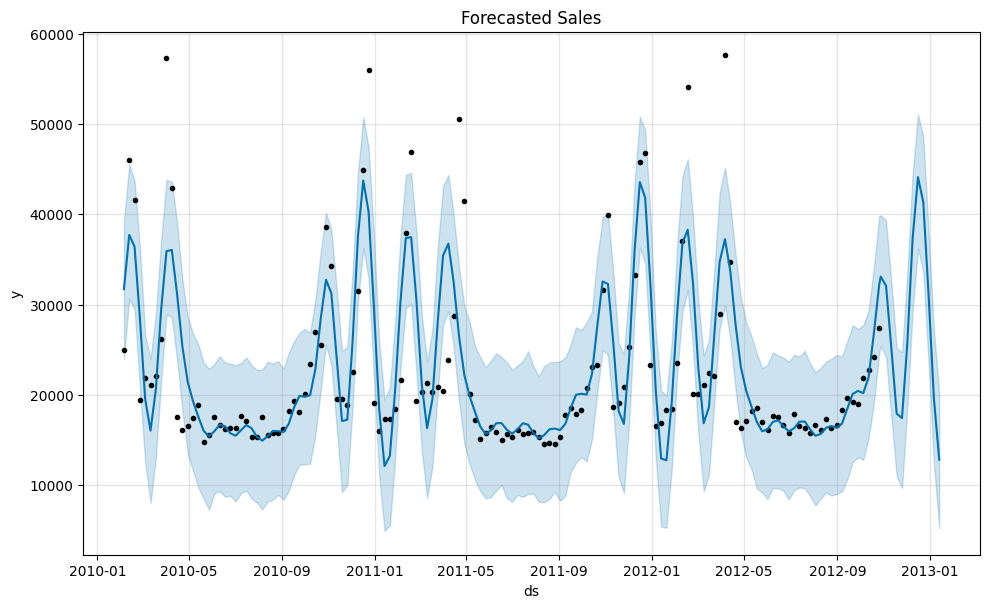

In [11]:
fig1 = model.plot(forecast)
plt.title('Forecasted Sales')
plt.show()

###  View Forecasted Values
Display the forecast for the last 12 predicted weeks including predicted sales (`yhat`) and confidence intervals.


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,33093.941092,25415.728820,39858.817885
144,2012-11-04,32086.959790,24192.614813,39275.010914
145,2012-11-11,25165.419421,17488.543112,32470.562057
146,2012-11-18,17917.956134,10970.641044,25161.548508
147,2012-11-25,17421.851183,9657.193689,24741.480618
148,2012-12-02,25670.253816,18498.239502,33420.131508
149,2012-12-09,37340.172614,29374.433623,44524.599952
150,2012-12-16,44112.623638,36152.021010,51052.315839
151,2012-12-23,41336.064209,33673.940565,48628.786276
152,2012-12-30,31049.863627,23502.502570,38141.755205


##  Summary: Walmart Sales Time-Series Forecasting

In this notebook, we performed time-series forecasting on Walmart sales data using **Facebook Prophet**, a robust and interpretable forecasting model. Here's a summary of what we accomplished:

1. **Data Loading and Merging**
   - Loaded `train.csv`, `features.csv`, and `stores.csv`
   - Merged them into a single dataset for analysis

2. **Preprocessing**
   - Converted date column to datetime
   - Filtered the data for a specific Store and Department (Store 1, Dept 1)
   - Aggregated sales data weekly

3. **Visualization**
   - Plotted historical sales to detect trends and seasonality

4. **Modeling with Prophet**
   - Trained a Prophet model on the weekly sales
   - Forecasted sales for the next 12 weeks
   - Visualized forecast with confidence intervals

5. **Forecast Output**
   - Displayed the predicted sales (`yhat`) and its confidence bounds (`yhat_lower`, `yhat_upper`)

This approach provides a solid foundation for forecasting demand across different stores and departments. You can now scale this process for multiple combinations or enhance it using external features like holidays, fuel prices, or store types.



